Our group becided to determine what the best neighborhood to bike through would be. We decided on this metric in particular because while looking through all the different datasets, we tried to determine what metric we could do with the data provided. After looking through all the data, we saw that there was a lot of road and traffic data and came to the conclusion that the best neighborhood to bike in would be well supported with data.

# Traffic Signs

Pittsburgh is known for its unique topography, with steep hills and rolling terrain defining much of the city's character. While biking is popular here, the slope of the terrain can significantly affect the riding experience. Steep inclines can be a challenge for many cyclists, especially those commuting to get off work or for leisure cycling, while flatter areas provide a more convenient and enjoyable experience. By focusing on analyzing the distribution of slopes in Pittsburgh neighborhoods, my goal was to identify the areas most suitable for biking.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
print(os.getcwd())

/Users/ckillmeyer/Final10


I have successfully loaded the data and displayed the first 15 rows.

In [3]:
df = pd.read_csv('city_traffic_signs.csv')
df.columns = [col.replace('_', ' ').title() for col in df.columns]
df.head(15)

,Id,Id,Mutcd Code,Address Number,Street,City,Mounting Fixture,Date Installed,Description,Neighborhood,Council District,Ward,Tract,Public Works Division,Pli Division,Police Zone,Fire Zone,Latitude,Longitude
0,1,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,2,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,3,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,4,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,5,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
5,6,283941710,WF,1010,Middle St,Pittsburgh,Metal Pole,1995-02-08,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456659,-79.999908
6,7,1858577624,WF,1107,Sherman Ave,Pittsburgh,Metal Pole,1995-03-22,Wayfinding Signage,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-21,40.454961,-80.009709
7,8,1338013353,WF,1010,Middle St,Pittsburgh,Wood Pole,1996-05-09,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456723,-79.999692
8,9,208075892,WF,500,E North Ave,Pittsburgh,Wood Pole,1994-09-21,Wayfinding Signage,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.456514,-80.001359
9,10,565974481,R1-1,1434,N St Clair St,Pittsburgh,Wood Pole,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478543,-79.919190


We can use stop signs to determine which places are suitable for cycling. If there are many stop signs in a community, it means that the speed of cars there is also slow, so it will be safer.

To study the distribution of stop signs in the Pittsburgh area, we can filter the dataset for specific MUTCD codes that represent stop signs (e.g., R1-1) and count their occurrences. By visualizing the data using a pie chart, we can clearly see the proportion of stop signs relative to other signs.

I identified different traffic signs by using MUTCD codes, but these codes are not intuitive to most people. To make the analysis easier to understand, I mapped these codes to more understandable names, such as "Stop Sign" or "Speed ​​Limit".

Index([' Id', 'Id', 'Mutcd Code', 'Address Number', 'Street', 'City',
       'Mounting Fixture', 'Date Installed', 'Description', 'Neighborhood',
       'Council District', 'Ward', 'Tract', 'Public Works Division',
       'Pli Division', 'Police Zone', 'Fire Zone', 'Latitude', 'Longitude'],
      dtype='object')


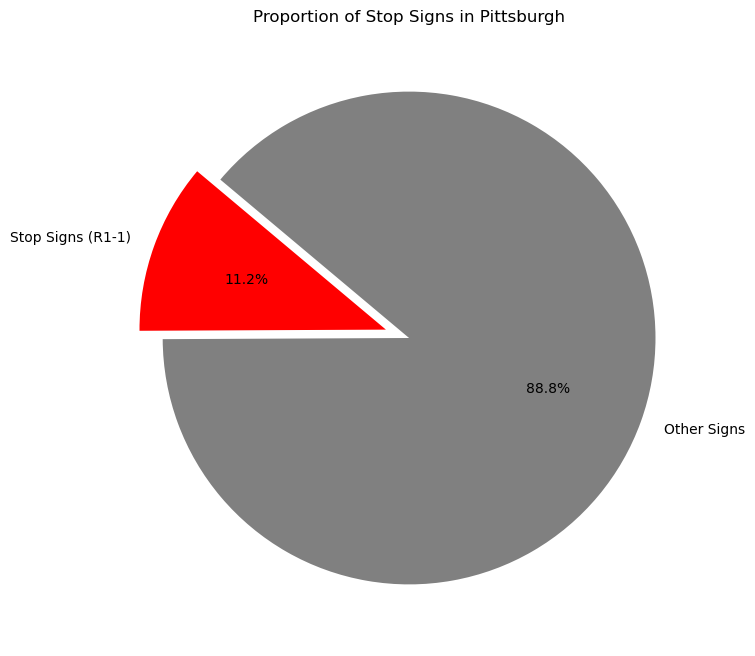

In [66]:
print(df.columns)
stop_signs = df[df['Mutcd Code'] == 'R1-1']

# Count stop signs and other signs
stop_sign_count = len(stop_signs)
total_sign_count = len(df)
other_sign_count = total_sign_count - stop_sign_count

# Create data for the pie chart
labels = ['Stop Signs (R1-1)', 'Other Signs']
sizes = [stop_sign_count, other_sign_count]
colors = ['red', 'gray']
explode = (0.1, 0)  # Highlight stop signs

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Proportion of Stop Signs in Pittsburgh')
plt.show()

The proportion of stop signs does not seem to be that high in the overall picture.

Next, I need to find the distribution data and location information of stop signs in the Pittsburgh area. This data is very important for analyzing traffic flow and cycling friendliness. By knowing the location and number of traffic lights, I can further evaluate which areas have busier traffic, and then I will sort them.

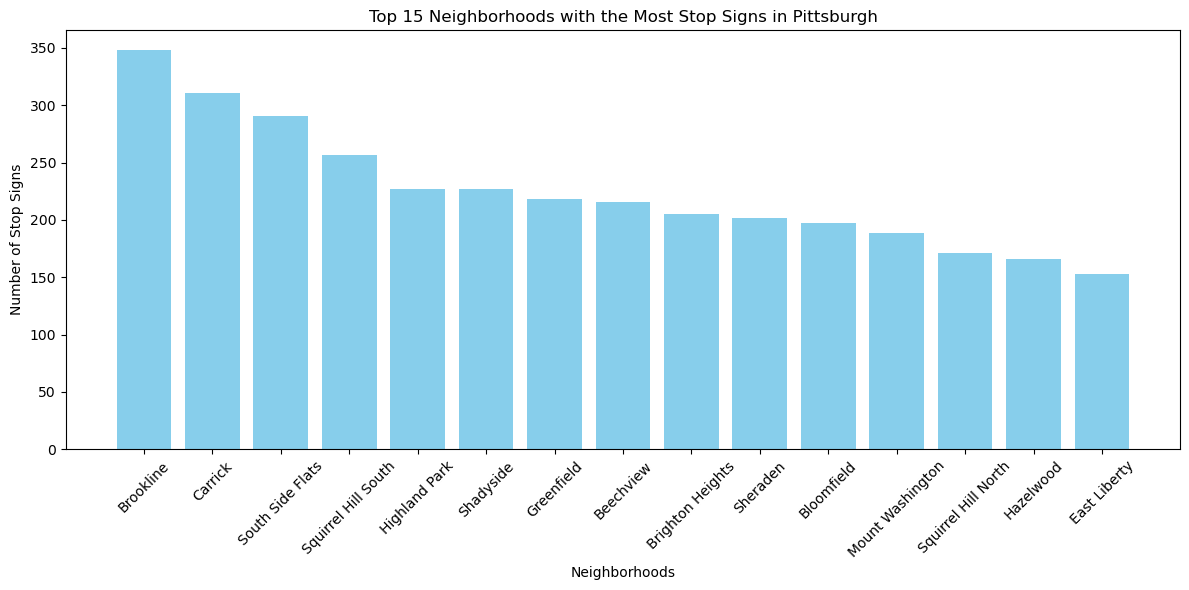

In [77]:
stop_signs = df[df['Mutcd Code'] == 'R1-1']  # Adjust 'Mutcd Code' to match your actual column name

# Group by Neighborhoods and count stop signs
stop_signs_by_neighborhood = stop_signs.groupby('Neighborhood').size().reset_index(name='Stop Sign Count')

# Sort by stop sign count and take the top 15 neighborhoods
top_15_neighborhood = stop_signs_by_neighborhood.sort_values(by='Stop Sign Count', ascending=False).head(15)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_15_neighborhood['Neighborhood'], top_15_neighborhood['Stop Sign Count'], color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Stop Signs')
plt.title('Top 15 Neighborhoods with the Most Stop Signs in Pittsburgh')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart highlights the top 15 neighborhoods in Pittsburgh with the highest number of stop signs, with areas like Brookline, Carrick, and South Side Flats leading the list. Neighborhoods with a higher number of stop signs tend to have slower-moving traffic, as vehicles are required to stop more frequently. This naturally creates a safer and more controlled environment, making these areas potentially more bike-friendly. Slower traffic reduces the risk of accidents and enhances the overall biking experience, which is crucial for both recreational cyclists and commuters. Based on this analysis, neighborhoods with more stop signs, such as Brookline and Carrick, can be considered some of the best areas for biking in Pittsburgh. 

# Speed Bumps

I decided to look at terrain as a subset to where the best neighborhood to bike in is. To do this, I looked at a dataset that compliled all the speedbumps throughout Pittsburgh neighborhoods and decided that whichever neighborhood had the most speedbumps was the best terrain. I figured that when biking you would want there to be more speed bumps to slow cars around you down.

First I imported all the things I needed such as pandas and matplotlib so I could have them in my program.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

I attempted to read in the speedBumps.csv file, however it wasn't reading the file name dispite it being in the same folder as my notebook. I solved this by importing os and running os.getcwd() to see what directory I was in. It turned out the notebook was trying to run from just the users directory so I moved both files outside any folders and the program was able to read in the file.

In [9]:
import os
print(os.getcwd())

/Users/ckillmeyer/Final10


After figuring out why the file wasn't reading in, I set the file equal to the varibale df and printed out the first 10 rows to get a look at what the dataset looks like.

In [10]:
df = pd.read_csv('speedBumps.csv')
df.head(10)

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,100,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,101,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,102,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,103,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,104,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


Next I wanted to remove two of the columns that I really didn't need, council_district and ward. to start this process I printed out the column names to make sure that all  atched up and would drop accordingly.

In [31]:
#df = df.drop(colums=['ward', 'council_district'])
#df.head(10)
print(df.columns)

Index(['_id', 'id', 'hump_id', 'locator_address_number', 'locator_street',
       'pavement', 'speed_hump_material', 'neighborhood', 'council_district',
       'ward', 'tract', 'public_works_division', 'pli_division', 'police_zone',
       'fire_zone', 'latitude', 'longitude'],
      dtype='object')


I used the information from the column names to properly name, and get ride of the columns I didn't want. At first it was just two, but I figured things like the fire zones and different divisions didn't matter as long as I had the neighborhood names.

In [34]:
df2 = df.drop(columns=['ward', 'council_district', 'tract', 'public_works_division', 'pli_division', 'police_zone', 'fire_zone'])
df2.head(10)

,_id,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,latitude,longitude
0,1,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,40.419835,-79.926062
1,34,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,40.425040,-79.912040
2,67,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,40.456746,-79.954521
3,68,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,40.457333,-79.954899
4,69,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,40.458061,-79.955355
5,100,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,40.422239,-79.926208
6,101,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,40.391643,-79.999307
7,102,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,40.392425,-79.999259
8,103,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,40.393264,-79.999401
9,104,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,40.394180,-79.999611


I then took the data left and decided to put it into a bar graph to visulize the data. This also makes the data much easier to compare between neighborhoods. I first counted the values for each neighborhood to figure out how many speed bumps were in each area and made the graph bigger to better see the data. I then made the grapth a bar graph and colored to blue so it would look a little nicer.

In [73]:
neighborhood_num = df['neighborhood'].value_counts()
plt.figure(figsize=(10, 6))
neighborhood_num.plot(kind='bar', color='skyblue')

<Axes: xlabel='neighborhood'>

After doing basic things to the graph, I decided it could look nicer. I added a title to the graph along with a title for the x and y axis. I also rotated the labels for the neighborhoods to be diagonal so they would look a bit nicer visually. The graph also initally had decimal values along the y-axis for the scale, so I decided to fix it to be just integers. To do this, I found the max number of neighborhoods in the dataset and made that plus one my max value. I then had zero be the starting value and it scale by one.

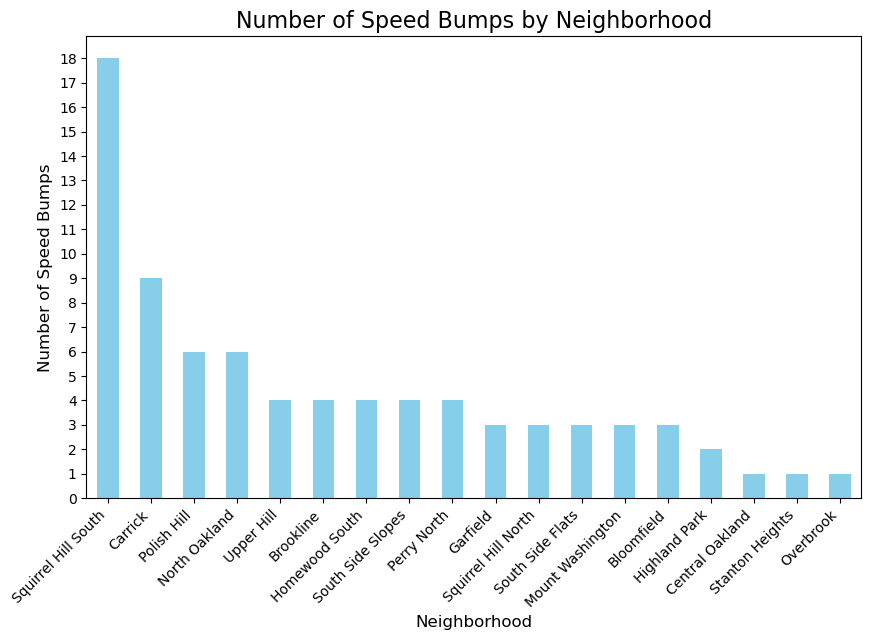

In [74]:
plt.title('Number of Speed Bumps by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Speed Bumps', fontsize=12)
plt.xticks(rotation=45, ha='right')
#Calculate out the max neighborhoods and set it equal to the yticks
y_max = neighborhood_num.max()
plt.yticks(np.arange(0, y_max + 1, step=1))
plt.show()

Using the graph of the dataset, you can see that Squirrel Hill South as substantially more speed bumps than any other neighborhood. This means that Squirrel Hill South would be the best terrain the travel through if you are biking. On the flip side, Central Oakland, Stanton Heights, and Overbrook all only have one speed bump within the neighborhood. This makes these three the worst terrain to travel through on a bike due to less speed bumps to go over while biking. Obviously, there are some neighborhoods that might not have any speed bumps and therefore, aren't included in this dataset. This means that there technically might be even worse neighborhoods, but for the purpose of this study, the three with only one speed bump are the worst. 

# Pavement Markings




















I first imported all the programs that i would need for the graphing.

In [58]:
# Import Required Libraries
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Initialize geolocator
geolocator = Nominatim(user_agent="pavement_markings")

Then i set a variable for the file, and print the first 15 lines.

In [45]:
pm = pd.read_csv('2016junebicycle-pavement-markings-existing.csv')
pm.head(15)

,Project ID,Year Added,Street,Cross Streets,Type,Protected Bike Lane,Street Distance (Miles),Bike Lane Distance (Miles),Shared Lane Marking Distance (Miles),Removed bike lane,Removed sharrow
0,1,1980,Resevoir Dr,Loop,Bike Lane,NaN,1.10,1.10,NaN,NaN,NaN
1,2,1980,Riverview Dr,Loop,Bike Lane,NaN,2.15,2.15,NaN,NaN,NaN
2,3,1983,Beechwood Ave,Fifth Ave/Saline St,Bike Lane,NaN,3.71,7.42,NaN,NaN,NaN
3,4,2007,Liberty Ave,Ligonier St/Baum Blvd,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,5,2007,Birmingham Bridge,E Carson St/Fifth/Forbes,Bike Lane,NaN,0.60,1.20,NaN,NaN,NaN
5,6,2008,East Liberty Blvd,Negley Ave/ Frankstown Rd,Bike Lane,NaN,0.92,1.85,NaN,NaN,NaN
6,7,2008,Greenfield Rd,Pocusset St/ Hobart St,BL/SH,NaN,0.40,0.40,0.40,NaN,NaN
7,8,2009,Wightman Ave,Forbes Ave/ Beacon,Bike Lane,NaN,0.27,0.54,NaN,NaN,NaN
8,9,2009,Beacon Ave,Wightman Ave/ Hobart St,Bike Lane,NaN,0.43,0.86,NaN,NaN,NaN
9,10,2009,Penn Ave,32nd St/ 16th St,Sharrows,NaN,1.10,NaN,1.10,NaN,NaN


After previewing the table, i realized that the only valuable information would be in some columns, so i got the names of the columns printed

In [9]:
print(pm.columns)

Index(['Project ID', 'Year Added', 'Street', 'Cross Streets', 'Type',
       'Protected Bike Lane', 'Street Distance (Miles)',
       'Bike Lane Distance (Miles)', 'Shared Lane Marking Distance (Miles)',
       'Removed bike lane', 'Removed sharrow'],
      dtype='object')


I realized at this point that there was nothing for the neighborhood it was in, so i had to convert the places into longitude and latitude using a service called Geocodio.

In [14]:
rg = pd.read_csv('668d7238-cfd2-492e-b397-51a6e74182ff.csv')
pm2 = pd.read_csv('2016junebicycle-pavement-markings-existing_geocodio_a672351e479b4bd0a0d356a3d0e7cc698ee55871.csv')
pm2.head(15)

,Project ID,Year Added,Street,Cross Streets,Type,Protected Bike Lane,Street Distance (Miles),Bike Lane Distance (Miles),Shared Lane Marking Distance (Miles),Removed bike lane,...,Number,Street.1,Unit Type,Unit Number,City,State,County,Zip,Country,Source
0,1,1980,"Resevoir Dr, Pittsburgh",Loop,Bike Lane,NaN,1.10,1.10,NaN,NaN,...,NaN,E West Dr,NaN,NaN,Pittsburgh,PA,Allegheny County,15237,US,TIGER/Line® dataset from the US Census Bureau
1,2,1980,"Riverview Dr, Pittsburgh",Loop,Bike Lane,NaN,2.15,2.15,NaN,NaN,...,NaN,Riverview Dr,NaN,NaN,Pittsburgh,PA,Allegheny County,15212,US,TIGER/Line® dataset from the US Census Bureau
2,3,1983,"Beechwood Ave, Pittsburgh",Fifth Ave/Saline St,Bike Lane,NaN,3.71,7.42,NaN,NaN,...,NaN,Beechwood Ave,NaN,NaN,Carnegie,PA,Allegheny County,15106,US,TIGER/Line® dataset from the US Census Bureau
3,4,2007,"Liberty Ave, Pittsburgh",Ligonier St/Baum Blvd,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Liberty Ave,NaN,NaN,Pittsburgh,PA,Allegheny County,15201,US,TIGER/Line® dataset from the US Census Bureau
4,5,2007,"Birmingham Bridge, Pittsburgh",E Carson St/Fifth/Forbes,Bike Lane,NaN,0.60,1.20,NaN,NaN,...,NaN,Birmingham Ave,NaN,NaN,Pittsburgh,PA,Allegheny County,15210,US,TIGER/Line® dataset from the US Census Bureau
5,6,2008,"East Liberty Blvd, Pittsburgh",Negley Ave/ Frankstown Rd,Bike Lane,NaN,0.92,1.85,NaN,NaN,...,NaN,E Liberty Blvd,NaN,NaN,Pittsburgh,PA,Allegheny County,15206,US,TIGER/Line® dataset from the US Census Bureau
6,7,2008,Greenfield Rd,Pocusset St/ Hobart St,BL/SH,NaN,0.40,0.40,0.40,NaN,...,NaN,NaN,NaN,NaN,Greenfield,IN,Hancock County,46140,US,TIGER/Line® dataset from the US Census Bureau
7,8,2009,"Wightman Ave, Pittsburgh",Forbes Ave/ Beacon,Bike Lane,NaN,0.27,0.54,NaN,NaN,...,NaN,Wightman St,NaN,NaN,Pittsburgh,PA,Allegheny County,15217,US,TIGER/Line® dataset from the US Census Bureau
8,9,2009,Beacon Ave,Wightman Ave/ Hobart St,Bike Lane,NaN,0.43,0.86,NaN,NaN,...,NaN,NaN,NaN,NaN,Avenue,MD,St. Mary's County,20609,US,TIGER/Line® dataset from the US Census Bureau
9,10,2009,"Penn Ave, Pittsburgh",32nd St/ 16th St,Sharrows,NaN,1.10,NaN,1.10,NaN,...,NaN,Penn Ave,NaN,NaN,Pittsburgh,PA,Allegheny County,15201,US,TIGER/Line® dataset from the US Census Bureau


I decided to print the columns, as there was many to look through

In [16]:
pm2.columns

Index(['Project ID', 'Year Added', 'Street', 'Cross Streets', 'Type',
       'Protected Bike Lane', 'Street Distance (Miles)',
       'Bike Lane Distance (Miles)', 'Shared Lane Marking Distance (Miles)',
       'Removed bike lane', 'Removed sharrow', 'Latitude', 'Longitude',
       'Accuracy Score', 'Accuracy Type', 'Number', 'Street.1', 'Unit Type',
       'Unit Number', 'City', 'State', 'County', 'Zip', 'Country', 'Source'],
      dtype='object')

After looking at all the columns, I decided that the only columns that matter were the protected bike lane, longitude, and latitude.

In [31]:
pm3 = pd.read_csv('2016junebicycle-pavement-markings-existing_geocodio_a672351e479b4bd0a0d356a3d0e7cc698ee55871.csv', usecols = [5,11,12])
pm3.head(15)

,Protected Bike Lane,Latitude,Longitude
0,NaN,40.509777,-80.016822
1,NaN,40.482658,-80.024487
2,NaN,40.403430,-80.084923
3,NaN,40.459815,-79.970178
4,NaN,40.402689,-79.985396
5,NaN,40.466148,-79.923138
6,NaN,39.821787,-85.775403
7,NaN,40.438358,-79.927541
8,NaN,38.300217,-76.743445
9,NaN,40.464380,-79.963682


After making a new table, I needed to look up the neighborhoods where each street was - and needed to filter it specifically to pittsburgh, and anything that wasnt in Pittsburgh was marked with N/A.

In [54]:
# Extract Neighborhood Information
neighborhoods = []

# Iterate through the latitude and longitude columns to get neighborhood information
for lat, lon in zip(pm3['Latitude'], pm3['Longitude']):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        address = location.raw['address']
        neighborhood = address.get('neighbourhood', 'N/A')
    except Exception as e:
        neighborhood = 'N/A'
    neighborhoods.append(neighborhood)

# Add the neighborhoods to the DataFrame
pm3['Neighborhood'] = neighborhoods

# Display the updated DataFrame
pm3.head(15)

,Protected Bike Lane,Latitude,Longitude,Neighborhood
0,NaN,40.509777,-80.016822,N/A
1,NaN,40.482658,-80.024487,Perry North
2,NaN,40.403430,-80.084923,N/A
3,NaN,40.459815,-79.970178,Strip District
4,NaN,40.402689,-79.985396,Carrick
5,NaN,40.466148,-79.923138,N/A
6,NaN,39.821787,-85.775403,N/A
7,NaN,40.438358,-79.927541,Squirrel Hill North
8,NaN,38.300217,-76.743445,N/A
9,NaN,40.464380,-79.963682,Lower Lawrenceville


After getting the neighborhoods, I decided to save the file as a new csv, as it would be easier to work at instead of storing it as a local variable (and easier for the grader, as they wouldnt have to use geolocator)

In [56]:
pm3.to_csv('updated_pavement_markings.csv', index=False)

After saving the file, I decided to use the graphing tool to only show the occurances of the protected bike lanes. This would help narrow down which neighborhood was the best.

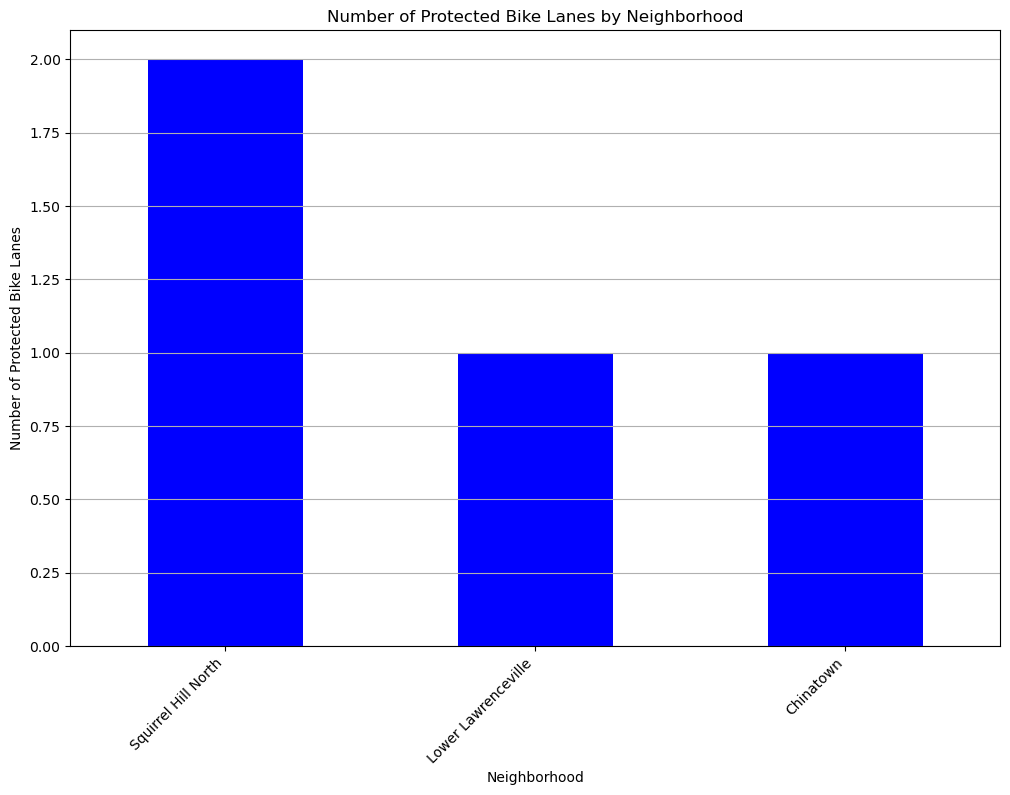

In [69]:
pm3 = pd.read_csv('updated_pavement_markings.csv')
# Filter the DataFrame for protected bike lanes
protected_bike_lanes = pm3[pm3['Protected Bike Lane'] == 'x']

# Count the occurrences of protected bike lanes in each neighborhood
neighborhood_counts = protected_bike_lanes['Neighborhood'].value_counts()

# Plot the Data
plt.figure(figsize=(12, 8))
neighborhood_counts.plot(kind='bar', color='blue')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Protected Bike Lanes')
plt.title('Number of Protected Bike Lanes by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

After filtering it down to the protected bike lanes, i decided to mix them together, and get the final graph of all the bike lanes in Pittsburgh.

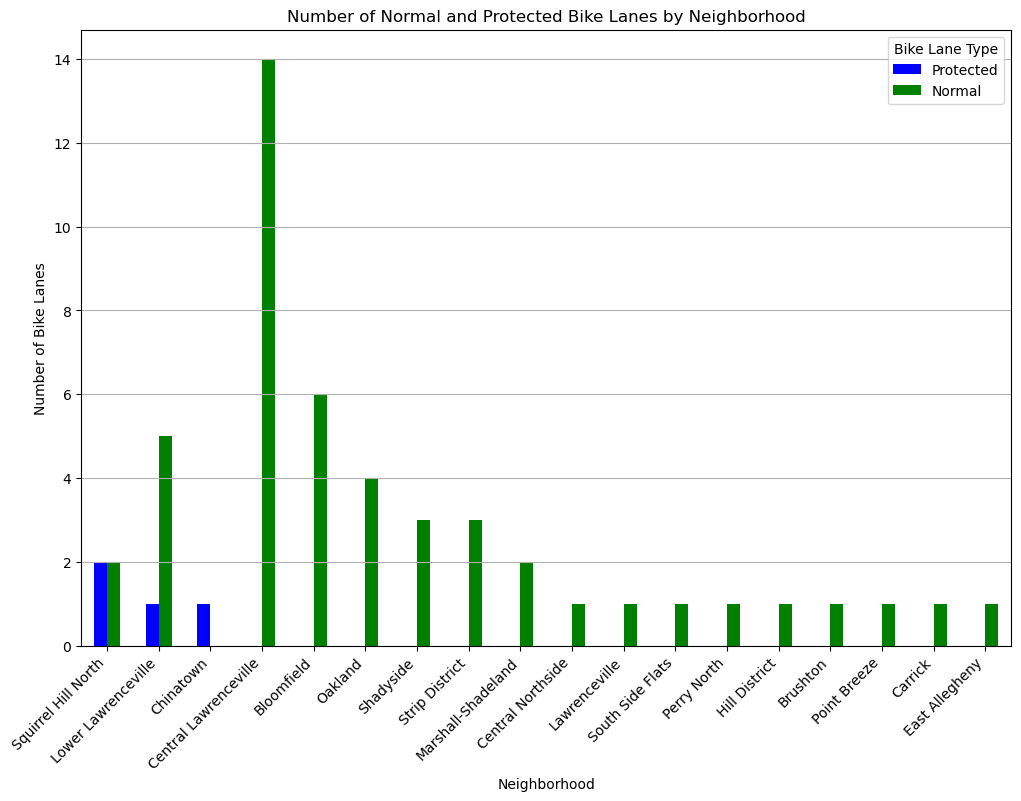

In [73]:
# Filter the DataFrame for protected bike lanes
protected_bike_lanes = pm3[pm3['Protected Bike Lane'] == 'x']

# Filter the DataFrame for protected and normal bike lanes
protected_bike_lanes = pm3[pm3['Protected Bike Lane'] == 'x']
normal_bike_lanes = pm3[pm3['Protected Bike Lane'].isnull()]

# Count the occurrences of each type of bike lane in each neighborhood
protected_counts = protected_bike_lanes['Neighborhood'].value_counts().rename('Protected')
normal_counts = normal_bike_lanes['Neighborhood'].value_counts().rename('Normal')

# Combine the counts into a single DataFrame
bike_lane_counts = pd.concat([protected_counts, normal_counts], axis=1).fillna(0)

# Plot the Data
bike_lane_counts.plot(kind='bar', figsize=(12, 8), color=['blue', 'green'])
plt.xlabel('Neighborhood')
plt.ylabel('Number of Bike Lanes')
plt.title('Number of Normal and Protected Bike Lanes by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bike Lane Type')
plt.grid(axis='y')
plt.show()

Overall, I would say that Centeral Lawrenceville would be the most convinent for biking, but that Squirrel Hill North would be the safest for biking, as Lawrenceville has the highest number of bike lanes, but that Squirrel Hill has the most number of actual protected bike lanes, where it would be harder for a car to accidentally hit a biker.

# Conclusions

##### Conner: 
Overall, I think that the best neighborhood to bike in is Squirrel Hill. Squirrel Hill is near the top of the submetrics for both speed bumps and traffic signs. It is at the very top with the most speed bumps and it has the fourth most stop signs. It doesn't score high with bike lanes in general, but it does have the most protected bike lanes so I think that that boosts it's ranking. Squirrel Hill is the neighborhood that scores highly consistantly across all three submetrics, so I think that it deserves to be named the best neighborhood in Pittsburgh to bike in.

##### Jared:Overall, I would say that Squirrel Hill is the best neighborhood to bike in. Squirrel Hill is the top for protected bike lanes, speed bumps, and traffic signs. Its the safest to bike in, and shouldn't cause too many accidents based off of the data provided. Although there may not be as many actual bike lanes in total, the other metrics can make up for the lack of them.

##### Yundi:
Overall, Brookline is the best neighborhood for biking in Pittsburgh based on the number of stop signs, as more stop signs indicate slower vehicle speeds and a safer biking environment. Other top neighborhoods, such as Carrick and South Side Flats, also stand out for their bike-friendliness due to the high prevalence of stop signs, which help create a controlled and safer traffic flow for cyclists.